**We first import all the necessary libraries that we will use**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

for dirname, _, filenames in os.walk('/content/Titanic_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/Titanic_data/train.csv
/content/Titanic_data/gender_submission.csv
/content/Titanic_data/test.csv


## **Data analysis (Exploration)**

In [2]:
# get the data from the spreadsheets and save it
training = pd.read_csv('/content/Titanic_data/train.csv')
test = pd.read_csv('/content/Titanic_data/test.csv')

# add columns to indicate whether this is a training or testing sample
training['train_test'] = 1
test['train_test'] = 0

# make sure that you add (Survived) column in the test set because it is not there
test['Survived'] = np.NaN

# collect all of your data in one dataframe for later preprocessing and visualization
all_data = pd.concat([training,test])

all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [3]:
# Some thing I need to see
# info() describe()
# Histograms and boxplots
# Value counts
# Missing data
# Correlation
# Explore interesting themes
    # Wealthy survive?
    # By location
    # Age scatterplot with ticket price
    # Young and wealthy Variable?
    # Total spent?
# Feature engineering
# preprocess data together or use a transformer?
    # use label for train and test
# Scaling?

# Model Baseline
# Model comparison with CV

In [4]:
# a look at the Training set
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
training.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Untill Now, after taking a look at the training data, I noticed that Age column has some missing values and Cabin column has some more.

A good one: We can change the sex column to be 1 for male and 0 for female for better modeling

In [6]:
# use describe method to get better understanding of the numberical values and the statistcs of the training set

training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [7]:
training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [8]:
# explore the data from a numerical view and a catagorical view

train_num = training[['Age', 'SibSp','Parch', 'Fare']]
train_cat = training[['Survived', 'Pclass','Ticket','Sex','Cabin', 'Embarked',]]

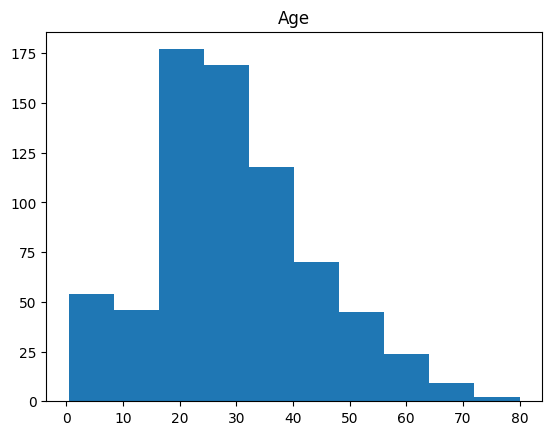

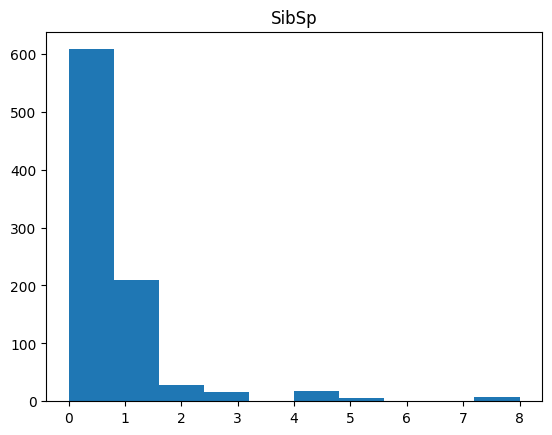

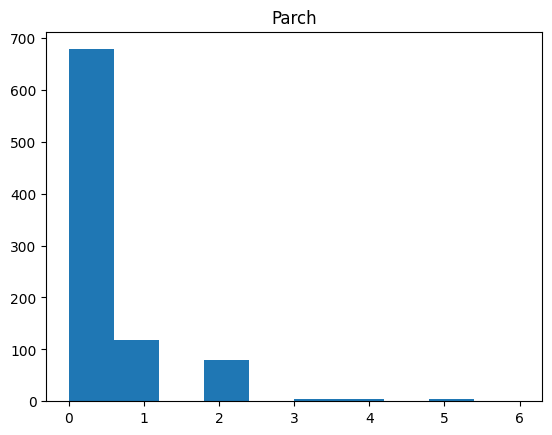

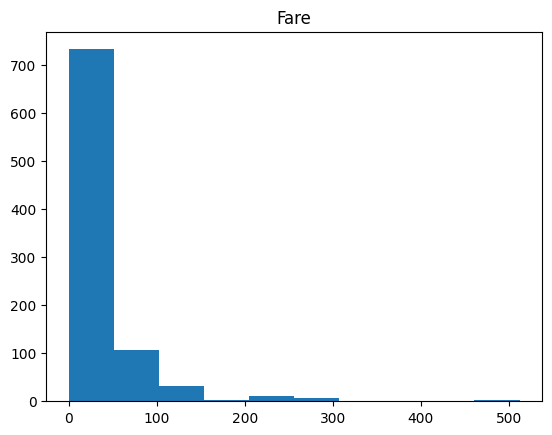

In [9]:
# Histograms for the numerical data to see the distributions
for i in train_num.columns:
  plt.hist(train_num[i])
  plt.title(i)
  plt.show()

So from what we see, we get that there is a problem in the distribution of the fare column so it needs to be normalized

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

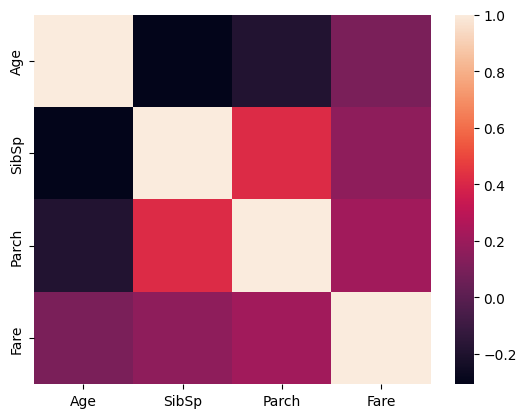

In [10]:
# Now we need to see the relations between all the numerical data
print(train_num.corr())

sns.heatmap(train_num.corr())

From here we notice that there is a +ve correlation between sibsp and parch

From here we notice that there is a -ve correlation between age and (sibsp - parch)

In [11]:
# compare survival rate across Age, SibSp, Parch, and Fare
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


people in there young age tend to servive and also people with slight more payment and with family tends to servive more aswell

people with sibiling or spouses struggle serviving

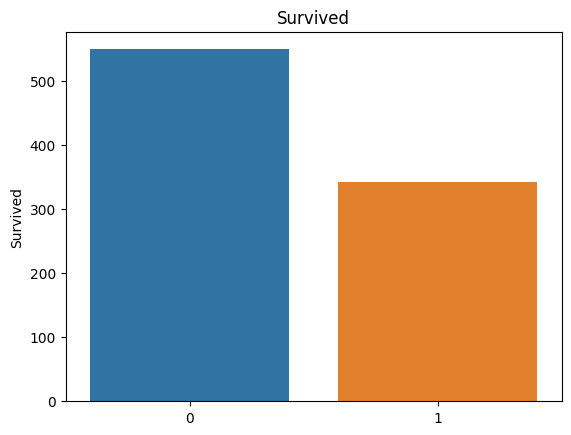

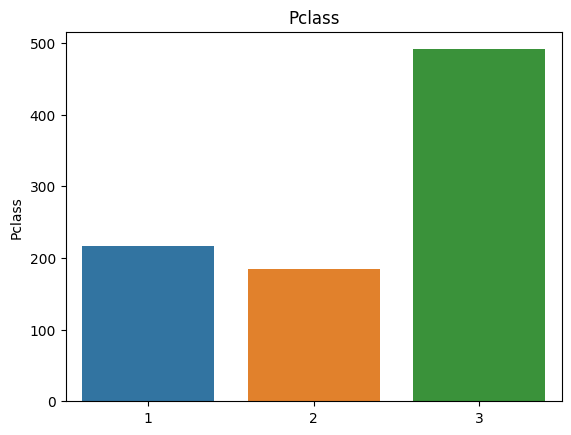

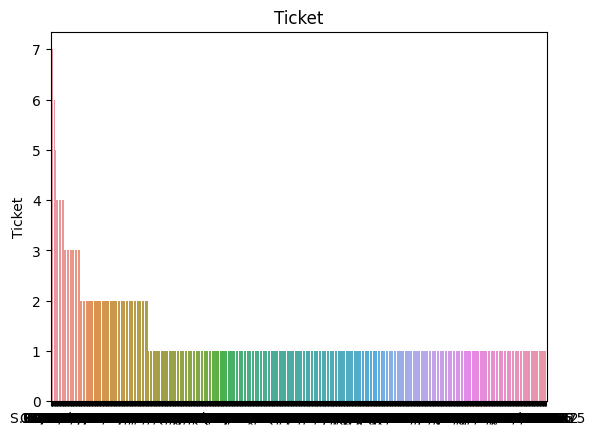

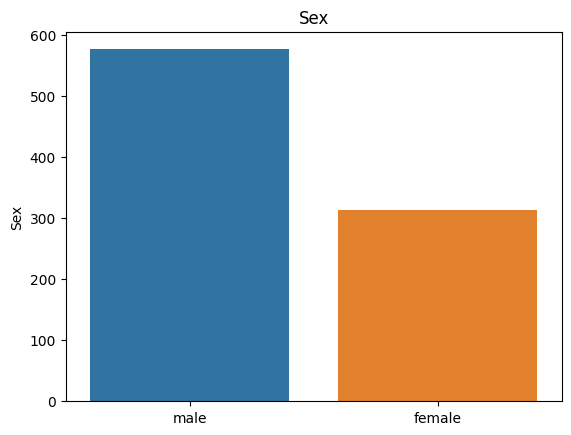

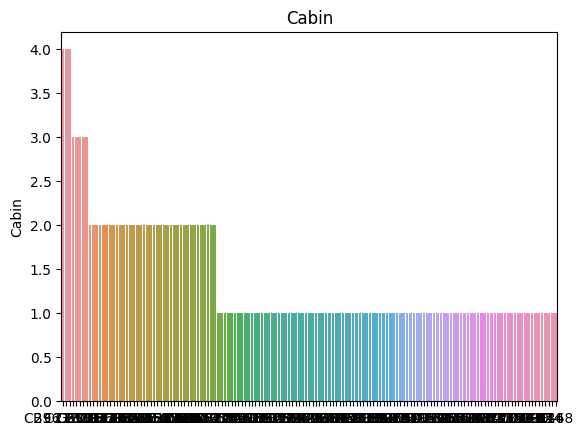

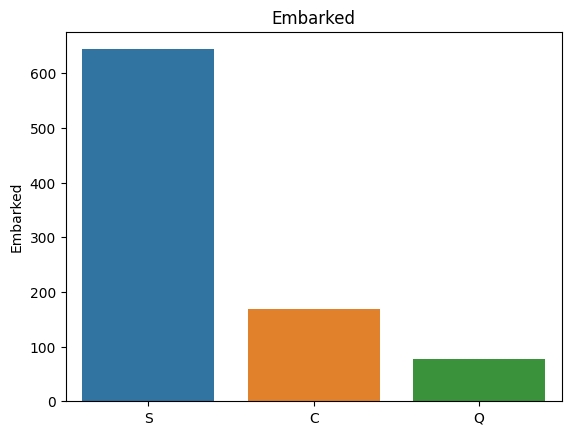

In [12]:
#lets make some barplot for the catagorical columns
for i in train_cat.columns:
    sns.barplot(x=train_cat[i].value_counts().index,y=train_cat[i].value_counts()).set_title(i)
    plt.show()

Survived people are less than to those who are not

S in Embark has the biggest number of people

Males are more than females

C in Pclass has the biggest number of people

In [13]:
# comparing survived column to each of the other catagorical columns

print(pd.pivot_table(training, index = 'Survived',aggfunc='count',columns='Pclass',values='Ticket'))
print('\n')
print(pd.pivot_table(training, index = 'Survived',aggfunc='count',columns='Sex',values='Ticket'))
print('\n')
print(pd.pivot_table(training, index = 'Survived',aggfunc='count',columns='Embarked',values='Ticket'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Sex       female  male
Survived              
0             81   468
1            233   109


Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


in class 1, there are more survived people than the others

males has sufferd more deaths and less surviving than women

Not so interesting results in embarked

In [14]:
train_cat.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [15]:
# see cabin column with a closer look
# first check the cabin number and how many people has got a cabin and did someone get more than one cabin ?
training['Cabin_mul'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

training['Cabin_mul'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin_mul, dtype: int64

Some people have multiple cabins but the majority of them didn't

In [16]:
print(pd.pivot_table(training, index = 'Survived',aggfunc='count',columns='Cabin_mul',values='Ticket'))

Cabin_mul      0      1    2    3    4
Survived                              
0          481.0   58.0  7.0  3.0  NaN
1          206.0  122.0  9.0  3.0  2.0


So people with cabins had higher survived number of people

In [17]:
# take a look at the cabins letter

training['Cabin_letter'] = training.Cabin.apply(lambda x: str(x)[0])

print(training['Cabin_letter'].value_counts())
print('\n')
print(pd.pivot_table(training, index = 'Survived',aggfunc='count',columns='Cabin_letter',values='Ticket'))

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_letter, dtype: int64


Cabin_letter    A     B     C     D     E    F    G    T      n
Survived                                                       
0             8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1             7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0


People with no cabins were in higher risk

In [18]:
train_cat.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [19]:
#take a look at ticket values better
training['ticket_num'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letter'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [20]:
training.ticket_num.value_counts()

1    661
0    230
Name: ticket_num, dtype: int64

In [21]:
training.ticket_letter.value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: ticket_letter, dtype: int64

So we mayn't need ticket letters because it seems that it is too complicated

so we will stick to the numeric vs non-numeric tickets

In [22]:
pd.pivot_table(training, index = 'Survived',aggfunc='count',columns='ticket_num',values='Ticket')

ticket_num,0,1
Survived,,
0,142,407
1,88,254


In [23]:
pd.pivot_table(training, index = 'Survived',aggfunc='count',columns='ticket_letter',values='Ticket')

ticket_letter,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


After taking a closer look at the tickets from all aspects (numbers and letters)

we found that the ratio isn't that big to conclude something from them

In [24]:
# take a look at the person's name

training.Name.head(100)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
                            ...                        
95                          Shorney, Mr. Charles Joseph
96                            Goldschmidt, Mr. George B
97                      Greenfield, Mr. William Bertram
98                 Doling, Mrs. John T (Ada Julia Bone)
99                                    Kantor, Mr. Sinai
Name: Name, Length: 100, dtype: object

In [25]:
training['name_abb'] = training.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())

training['name_abb'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_abb, dtype: int64

In [26]:
pd.pivot_table(training, index = 'Survived',aggfunc='count',columns='name_abb',values='Ticket')

name_abb,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


notice that people with (miss,Mrs) have higher chance for living

people with (Mrs) have lower chance

that stands for the conclusion we discussed earlier about men and women

so people's name doesn't have a real effect on the survival rate

# **Data Preprocessing**

In [29]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  train_test     891 non-null    int64  
 13  Cabin_mul      891 non-null    int64  
 14  Cabin_letter   891 non-null    object 
 15  ticket_num     891 non-null    int64  
 16  ticket_letter  891 non-null    object 
 17  name_abb       891 non-null    object 
dtypes: float64

In [55]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [54]:
training.loc[(training['Embarked'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Cabin_mul,Cabin_letter,ticket_num,ticket_letter,name_abb
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,1,B,1,0,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,1,B,1,0,Mrs


remove the two samples with embarked null values from dataframe for better modelling

Lets work with all_data

In [57]:
# create all the catagorical columns for all data for later train and test
all_data['name_abb'] = all_data.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
all_data['ticket_num'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letter'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['Cabin_letter'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['Cabin_mul'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))


#impute null values in age
all_data.Age = all_data.Age.fillna(training.Age.median())

#impute this null value in fare

all_data.Fare = all_data.Fare.fillna(training.Fare.median())


# remove two samples with null values in embarked

all_data.dropna(subset=['Embarked'],inplace=True)


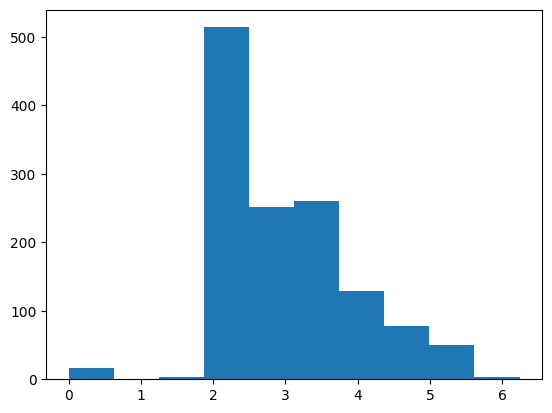

In [59]:
#normalize the fare as we dicussed before to adjust the distribution
all_data['fare_n'] = np.log(all_data.Fare+1)
plt.hist(all_data['fare_n'])
plt.show()

In [60]:
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test',
       'name_abb', 'ticket_num', 'ticket_letter', 'Cabin_letter', 'Cabin_mul',
       'fare_n'],
      dtype='object')

In [68]:
#create dummy var with get dummies
dummy_vars = pd.get_dummies(all_data[['Pclass','Sex', 'SibSp', 'Parch', 'fare_n','train_test','Embarked','ticket_num','Age','Cabin_letter', 'Cabin_mul','name_abb']])

In [69]:
dummy_vars.describe()

,Pclass,SibSp,Parch,fare_n,train_test,ticket_num,Age,Cabin_mul,Sex_female,Sex_male,...,name_abb_Master,name_abb_Miss,name_abb_Mlle,name_abb_Mme,name_abb_Mr,name_abb_Mrs,name_abb_Ms,name_abb_Rev,name_abb_Sir,name_abb_the Countess
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,...,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,2.296863,0.499617,0.385616,2.977061,0.680184,0.730681,29.471821,0.270849,0.355011,0.644989,...,0.046672,0.198164,0.001530,0.000765,0.579189,0.149962,0.001530,0.006121,0.000765,0.000765
std,0.836942,1.042273,0.866092,0.967476,0.466584,0.443776,12.881592,0.573882,0.478700,0.478700,...,0.211016,0.398769,0.039103,0.027661,0.493878,0.357171,0.039103,0.078026,0.027661,0.027661
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,2.185579,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,2.737881,1.000000,1.000000,28.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000,3.474293,1.000000,1.000000,35.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,8.000000,9.000000,6.240917,1.000000,1.000000,80.000000,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
#scaling the data , train, test

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
dummy_vars_scaled = dummy_vars.copy()
dummy_vars_scaled[['Age','SibSp','Parch','fare_n']]= scale.fit_transform(dummy_vars_scaled[['Age','SibSp','Parch','fare_n']])
dummy_vars_scaled

# splitting the data into train and test again

x_train = dummy_vars_scaled[dummy_vars_scaled.train_test==1].drop(['train_test'],axis=1)
x_test = dummy_vars_scaled[dummy_vars_scaled.train_test==0].drop(['train_test'],axis=1)

y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(889,)

# **Model building**

try different models to see the evaluation of each one to get the best one


we will see the best one according to cross validation

Logistic Regression

Decision Tree

K Nearest Neighbore

Random Forest

Support Vector Classifier

Xtreme Gradient Boosting

Voting Classifier

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

So, I will use cross validation

first, create the model, then run the model with data using cv

it spilts the data randomly into sets and train on one and test on the other

In [74]:
#logistic regression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.81460674 0.80337079 0.82022472 0.85310734]
0.8200596711737447


In [79]:
#knn
#finding the best k
error_rate=[]
for i in range (1,31):  #Took the range of k from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i)
    cv = cross_val_score(clf,x_train,y_train,cv=5)
    print(cv)
    print(i)
    print(cv.mean())
    error_rate.append(cv.mean())

[0.74719101 0.76966292 0.78651685 0.68539326 0.74576271]
1
0.7469053513616455
[0.7247191  0.78089888 0.79775281 0.75280899 0.80225989]
2
0.7716879324573097
[0.75280899 0.76404494 0.83146067 0.7752809  0.83615819]
3
0.7919507395416745
[0.78089888 0.79213483 0.81460674 0.76966292 0.83050847]
4
0.7975623690725576
[0.79775281 0.78651685 0.83707865 0.79775281 0.85310734]
5
0.8144416936456548
[0.80898876 0.8258427  0.83146067 0.80898876 0.84180791]
6
0.823417761696185
[0.82022472 0.82022472 0.82022472 0.80898876 0.85875706]
7
0.8256839966990415
[0.81460674 0.82022472 0.8258427  0.80337079 0.85875706]
8
0.8245604011934236
[0.83707865 0.82022472 0.83707865 0.81460674 0.82485876]
9
0.826769504221418
[0.83707865 0.83146067 0.83707865 0.79775281 0.84745763]
10
0.8301656827270996
[0.82022472 0.80898876 0.83146067 0.80337079 0.84745763]
11
0.8223005141877738
[0.82022472 0.82022472 0.83707865 0.79213483 0.85875706]
12
0.8256839966990415
[0.8258427  0.81460674 0.82022472 0.79775281 0.86440678]
13
0.8

<function matplotlib.pyplot.show(close=None, block=None)>

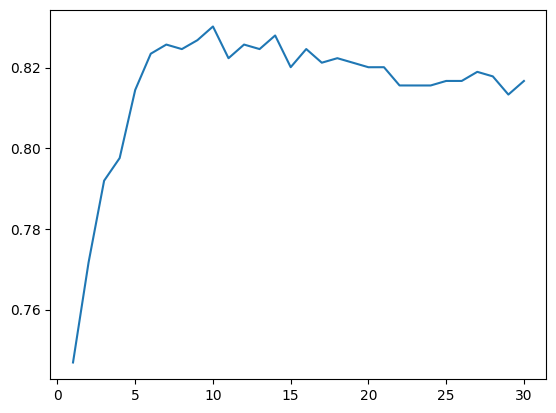

In [80]:
plt.plot(range(1,31),error_rate)
plt.show

In [94]:
knn = KNeighborsClassifier(n_neighbors=10)
cv = cross_val_score(knn,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83707865 0.83146067 0.83707865 0.79775281 0.84745763]
0.8301656827270996


In [84]:
dt = DecisionTreeClassifier(random_state=0)
cv = cross_val_score(dt,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75280899 0.75280899 0.83146067 0.75842697 0.8079096 ]
0.7806830444994605


In [85]:
rf = RandomForestClassifier(random_state=0)
cv = cross_val_score(rf,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81460674 0.78651685 0.86516854 0.73595506 0.82485876]
0.8054211896146766


In [89]:
sv = SVC(probability=True)
cv = cross_val_score(sv,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83707865 0.8258427  0.8258427  0.79775281 0.85875706]
0.8290547832158953


In [90]:
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81460674 0.82022472 0.87078652 0.78651685 0.83615819]
0.8256586047102139


In [96]:
voting= VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('svc',sv),('xgb',xgb)], voting = 'soft')
cv = cross_val_score(voting,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.8258427  0.84831461 0.79775281 0.8700565 ]
0.8391798387608709


In [119]:
voting.fit(x_train,y_train)
y_hat_base_vc = voting.predict(x_test).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

Logistic Regression (0.82)

Decision Tree (0.78)

K Nearest Neighbore (0.8301) with K = 10

Random Forest (0.8054)

Support Vector Classifier (0.829)

Xtreme Gradient Boosting (0.8256)

Voting Classifier (0.83917)

So the best choice for the model is Voting Classifier with out tuning

tune the model and see the differences

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [99]:
def performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [107]:
lr = LogisticRegression()
params = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = RandomizedSearchCV(lr, param_distributions = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(x_train,y_train)
performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Logistic Regression
Best Score: 0.8223132101821875
Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 2000, 'C': 29.763514416313132}


In [109]:
knn = KNeighborsClassifier()
params = {'n_neighbors' : [2,10,3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = RandomizedSearchCV(knn, param_distributions = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(x_train,y_train)
performance(best_clf_knn,'Knn')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Knn
Best Score: 0.8301656827270996
Best Parameters: {'weights': 'uniform', 'p': 2, 'n_neighbors': 10, 'algorithm': 'kd_tree'}


In [112]:
svc = SVC(probability = True)
params = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
           'C': [.1, 1, 10, 100, 1000]},
           {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
           {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = RandomizedSearchCV(svc, param_distributions = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(x_train,y_train)
performance(best_clf_svc,'svc')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
svc
Best Score: 0.8290547832158953
Best Parameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}


In [114]:
rf = RandomForestClassifier(random_state = 0)
params =  {'n_estimators': [100,500,1000],
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
clf_rf = RandomizedSearchCV(rf, param_distributions = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf= clf_rf.fit(x_train,y_train)
performance(best_clf_rf,'Random forest')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random forest
Best Score: 0.8324382657271631
Best Parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


<Axes: >

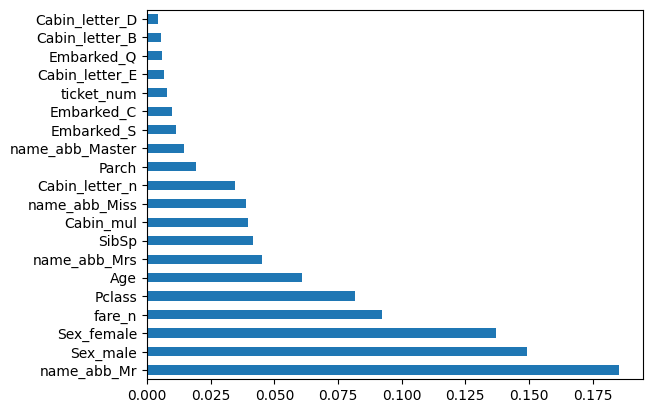

In [121]:
best_rf = best_clf_rf.best_estimator_.fit(x_train,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [123]:
y_hat_rf = best_clf_rf.best_estimator_.predict(x_test).astype(int)
xgb_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_rf}
submission_xgb = pd.DataFrame(data=xgb_submission)
submission_xgb.to_csv('rf_submission.csv', index=False)

In [117]:
xgb = XGBClassifier(random_state = 0)

params = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}
clf_xgb = RandomizedSearchCV(xgb, param_distributions = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb= clf_xgb.fit(x_train,y_train)
performance(best_clf_xgb,'Extreme Gradient boosting')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Extreme Gradient boosting
Best Score: 0.8391607947692503
Best Parameters: {'subsample': 0.55, 'sampling_method': 'uniform', 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 550, 'min_child_weight': 0.01, 'max_depth': None, 'learning_rate': 0.5, 'gamma': 0.5, 'colsample_bytree': 0.8}


In [122]:
y_hat_xgb = best_clf_xgb.best_estimator_.predict(x_test).astype(int)
xgb_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_xgb}
submission_xgb = pd.DataFrame(data=xgb_submission)
submission_xgb.to_csv('xgb_submission.csv', index=False)

<Axes: >

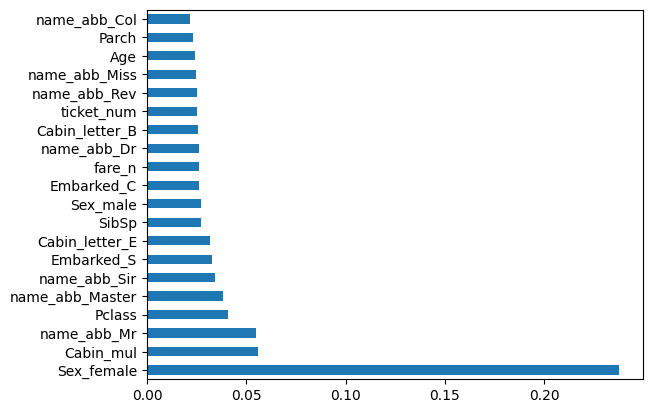

In [120]:
best_xgb = best_clf_xgb.best_estimator_.fit(x_train,y_train)
feat_importances = pd.Series(best_xgb.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

XGB has the probabilty of overfitting

In [124]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

voting_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard')
voting_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft')
voting_xgb = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('xgb', best_xgb)], voting = 'soft')

print('voting_hard :',cross_val_score(voting_hard,x_train,y_train,cv=5))
print('voting_hard mean :',cross_val_score(voting_hard,x_train,y_train,cv=5).mean())
print('\n')
print('voting_soft :',cross_val_score(voting_soft,x_train,y_train,cv=5))
print('voting_soft mean :',cross_val_score(voting_soft,x_train,y_train,cv=5).mean())
print('\n')
print('voting_xgb :',cross_val_score(voting_xgb,x_train,y_train,cv=5))
print('voting_xgb mean :',cross_val_score(voting_xgb,x_train,y_train,cv=5).mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

voting_hard : [0.8258427  0.80898876 0.83146067 0.80898876 0.86440678]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

voting_hard mean : 0.8279375357074844




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

voting_soft : [0.8258427  0.82022472 0.82022472 0.78651685 0.85875706]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

voting_soft mean : 0.8200660191709515




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

voting_xgb : [0.83146067 0.83146067 0.84269663 0.80337079 0.87570621]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

voting_xgb mean : 0.83806259125246


looks like voting hard and voting xgb got the best results

xgb may be over trained

In [125]:
voting_hard.fit(x_train, y_train)
voting_xgb.fit(x_train, y_train)

y_hat_hard = voting_hard.predict(x_test).astype(int)
y_hat_xgb = voting_xgb.predict(x_test).astype(int)

final_data_hard = {'PassengerId': test.PassengerId, 'Survived': y_hat_hard}
submission_hard = pd.DataFrame(data=final_data_hard)

final_data_xgb = {'PassengerId': test.PassengerId, 'Survived': y_hat_xgb}
submission_xgb = pd.DataFrame(data=final_data_xgb)

final_data_comp = {'PassengerId': test.PassengerId, 'Survived_hard': y_hat_hard, 'Survived_xgb' : y_hat_xgb}
Compare = pd.DataFrame(data=final_data_comp)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [126]:
Compare['difference_hard_xgb'] = Compare.apply(lambda x: 1 if x.Survived_hard != x.Survived_xgb else 0, axis =1)

In [127]:
Compare.difference_hard_xgb.value_counts()

0    402
1     16
Name: difference_hard_xgb, dtype: int64

In [128]:
submission_hard.to_csv('submission_hard.csv', index =False)
submission_xgb.to_csv('submission_xgb.csv',index=False)